In [1]:
from networkx.algorithms import bipartite
import csv
import networkx as nx
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import plotly.graph_objs as go

In [2]:
movies = []
with open('SENA_DataSet - MCUActorList.csv') as f:
    file = csv.reader(f)
    for line in file:
        movies.append(line[0])
movies

['Iron Man',
 'The incredible Hulk',
 'Iron Man 2',
 'Thor',
 'Captain America: The first Avenger',
 "Marvel's the Avengers",
 'Iron Man 3',
 'Thor: The dark world',
 'Captain America : The Winter Soldier',
 'Guardians Of the Galaxy',
 'Avengers : Age of Ultron',
 'Ant-Man',
 'Captain America: Civil War',
 'Doctor Strange',
 'Guardians of the Galaxy Vol. 2',
 'Spider-Man:Homecoming',
 'Thor:Ragnarok',
 'Black Panther',
 'Avengers: Infinity War',
 'Ant-Man and the Wasp',
 'Captain-Marvel',
 'Avengers:Endgame',
 'Spider-Man:Far From Home',
 'Black Widow',
 'Shang-Chi and the Legend of the Ten Rings',
 'Eternals',
 'Spider-Man: No Way Home',
 'Doctor Strange in the Multiverse of Madness',
 'Thor: Love and Thunder']

In [3]:
actors = set()
with open('SENA_DataSet - MCUActorList.csv') as f:
    file = csv.reader(f)
    for line in file:
        for actor in line[1:]:
            if actor != '':
                actors.add(actor)
actors

{'Andrew Garfield',
 'Angelina Jolie',
 'Anthony Hopkins',
 'Anthony Mackie',
 'Awkwafina',
 'Barry Keoghan',
 'Ben Kingsley',
 'Ben Mendelsohn',
 'Benedict Cumberbatch',
 'Benedict Wong',
 'Bradely Cooper',
 'Bradley Cooper',
 'Brie Larson',
 'Cate Blanchett',
 'Chadwick Boseman',
 'Chiswetel Ejiofor',
 'Chris Evans',
 'Chris Hemsworth',
 'Chris Patt',
 'Christian Bale',
 'Corey Stall',
 'Dave Bautista',
 'David Harbour',
 'Don Cheadle',
 'Edward Norton',
 'Elisabeth Olsen',
 'Evangeline Lilly',
 'Florence Pugh',
 'Gemma Chan',
 'Guy Pearce',
 'Gweneth Paltrow',
 'Hugo Weaving',
 'Idris Elba',
 'Jacob Batalon',
 'Jake Gyllenhaal',
 'Jeremy Renner',
 'Josh Brolin',
 'Kumail Nanjiani',
 'Letitia Wright',
 'Liv Tyler',
 "Lupita Nyong'o",
 'Mark Ruffalo',
 'Martin Freeman',
 'Mengâ€™er Zhang',
 'Michael B. Jordan',
 'Michael Douglas',
 'Michael Keaton',
 'Micheal Pena',
 'Mickey Rourke',
 'Natalie Portman',
 'Paul Rudd',
 'Racheal McAdams',
 'Rachel Weisz',
 'Richard Madden',
 'Robert Dow

In [4]:
G = nx.Graph()

In [15]:
G.add_nodes_from(actors,bipartite='Actors')
G.add_nodes_from(movies,bipartite='Movies')

In [16]:
with open('SENA_DataSet - MCUActorList.csv') as f:
    file = csv.reader(f)
    for line in file:
        movie = line[0]
        for i in line[1:]:
            if i != '':
                G.add_edge(movie,i)

In [17]:
actor_nodes = [n for n,d in G.nodes(data=True) if d['bipartite'] == 'Actors']
movie_nodes = [n for n,d in G.nodes(data=True) if d['bipartite'] == 'Movies']
print('Actors : ',actor_nodes,end='\n\n')
print('Movies : ',movie_nodes,end='\n\n')
print('Is Bipartite : ',bipartite.is_bipartite(G))
print(bipartite.is_bipartite_node_set(G,actor_nodes))

Actors :  ['Florence Pugh', 'Natalie Portman', 'Xochiti Gomez', 'Michael Keaton', 'Kumail Nanjiani', 'David Harbour', 'Richard Madden', 'Tom Hiddleston', 'Mickey Rourke', 'Jacob Batalon', 'Martin Freeman', 'Robert Downey Jr.', 'Benedict Wong', 'Anthony Hopkins', 'Don Cheadle', 'Terrence Howard', 'Corey Stall', 'Taika Waititi', 'Micheal Pena', 'Christian Bale', 'Jeremy Renner', 'Chadwick Boseman', 'Racheal McAdams', 'Tim Roth', 'Zoe Saldana', 'Bradely Cooper', 'Sebastian Stan', 'Bradley Cooper', 'Idris Elba', 'Samuel L. Jackson', 'Ben Mendelsohn', 'Mark Ruffalo', 'Paul Rudd', 'Evangeline Lilly', 'Anthony Mackie', 'Letitia Wright', 'Gweneth Paltrow', 'Chris Hemsworth', 'Tessa Thompson', 'Brie Larson', 'Gemma Chan', 'Elisabeth Olsen', 'Liv Tyler', 'Simu Liu', 'Benedict Cumberbatch', 'Cate Blanchett', 'Zendaya', 'Scarlett Johansson', 'Vin Diesel', "Lupita Nyong'o", 'Chris Evans', 'Awkwafina', 'Hugo Weaving', 'Rachel Weisz', 'Tobey Maguire', 'Barry Keoghan', 'Michael Douglas', 'Chiswetel Ej

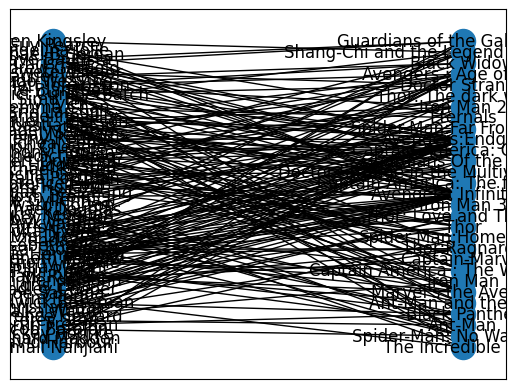

In [18]:
nx.draw_networkx(G,pos=nx.drawing.bipartite_layout(G,actors),width=1)

In [19]:
nx.write_gexf(G,'MCU_actors_movies_bipartite.gexf')

In [20]:
B = bipartite.weighted_projected_graph(G, actors, ratio=False)
B.edges(data=True)

EdgeDataView([('Florence Pugh', 'Rachel Weisz', {'weight': 1}), ('Florence Pugh', 'Scarlett Johansson', {'weight': 1}), ('Florence Pugh', 'David Harbour', {'weight': 1}), ('Natalie Portman', 'Taika Waititi', {'weight': 1}), ('Natalie Portman', 'Christian Bale', {'weight': 1}), ('Natalie Portman', 'Tessa Thompson', {'weight': 1}), ('Natalie Portman', 'Chris Hemsworth', {'weight': 3}), ('Natalie Portman', 'Tom Hiddleston', {'weight': 2}), ('Natalie Portman', 'Idris Elba', {'weight': 2}), ('Natalie Portman', 'Anthony Hopkins', {'weight': 1}), ('Xochiti Gomez', 'Benedict Cumberbatch', {'weight': 1}), ('Xochiti Gomez', 'Racheal McAdams', {'weight': 1}), ('Xochiti Gomez', 'Elisabeth Olsen', {'weight': 1}), ('Xochiti Gomez', 'Benedict Wong', {'weight': 1}), ('Michael Keaton', 'Tom Holland', {'weight': 1}), ('Michael Keaton', 'Robert Downey Jr.', {'weight': 1}), ('Michael Keaton', 'Jacob Batalon', {'weight': 1}), ('Kumail Nanjiani', 'Barry Keoghan', {'weight': 1}), ('Kumail Nanjiani', 'Angelin

In [21]:
nx.write_gexf(B,'MCU_actors_projections.gexf')

In [27]:
number_of_connected_components = nx.number_connected_components(B)
print('Number of Connected Components : ', number_of_connected_components,end='\n\n')
connected_components = list(nx.connected_components(B))
for i in connected_components:
    print(i,end='\n\n')


Number of Connected Components :  3

{'Florence Pugh', 'Natalie Portman', 'Xochiti Gomez', 'Michael Keaton', 'David Harbour', 'Tom Hiddleston', 'Mickey Rourke', 'Jacob Batalon', 'Martin Freeman', 'Robert Downey Jr.', 'Benedict Wong', 'Don Cheadle', 'Anthony Hopkins', 'Terrence Howard', 'Corey Stall', 'Taika Waititi', 'Micheal Pena', 'Christian Bale', 'Jeremy Renner', 'Chadwick Boseman', 'Racheal McAdams', 'Zoe Saldana', 'Bradely Cooper', 'Sebastian Stan', 'Bradley Cooper', 'Idris Elba', 'Samuel L. Jackson', 'Ben Mendelsohn', 'Mark Ruffalo', 'Paul Rudd', 'Evangeline Lilly', 'Anthony Mackie', 'Letitia Wright', 'Gweneth Paltrow', 'Chris Hemsworth', 'Tessa Thompson', 'Brie Larson', 'Elisabeth Olsen', 'Simu Liu', 'Benedict Cumberbatch', 'Cate Blanchett', 'Zendaya', 'Scarlett Johansson', 'Vin Diesel', 'Awkwafina', 'Chris Evans', "Lupita Nyong'o", 'Rachel Weisz', 'Hugo Weaving', 'Tobey Maguire', 'Michael Douglas', 'Chiswetel Ejiofor', 'Jake Gyllenhaal', 'Chris Patt', 'Dave Bautista', 'Michael